## 피마 인디언 데이터 분석하기

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


### 데이터 가져오기

In [2]:
import pandas as pd

pima = pd.read_csv('/gdrive/My Drive/Colab Notebooks/인공지능강의안/data/pima.csv', 
                   names=["pregnant", "plasma", "pressure", "thickness", "insulin", 
                          "BMI", "pedigree", "age", "class"])
pima.head(10)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# 데이터 정보 출력
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
#일부 데이터 정보만 출력
pima[["pregnant", "class"]].head(10)

In [4]:
# 정보별 샘플 수, 평균, 표준편차, 최소값, 백분율에 따른 해당 값, 최대값 순으로 출력
pima.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 데이터 가공하기

- 원하는 목적 (당뇨병 발명을 예측하는 것)에 중점을 두고 가공해야 함.

In [5]:
# 임신 횟수와 당뇨병 발병 확률
print(pima[["pregnant", "class"]].groupby(["pregnant"], 
          as_index=False).mean().sort_values(by="pregnant", ascending=True))


    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


### 시각화하기

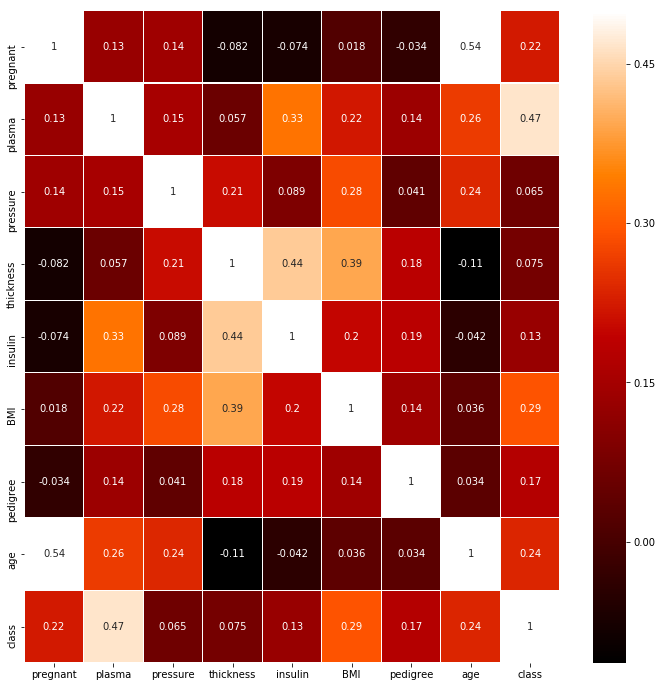

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
# df.corr() : 항목 간의 상관관계 분석
# linewidths : 각 셀의 테두리 두께
# vmax : 색상의 밝기값
# cmap : 미리 정해진 matplotlib 색상의 설정값
# linecolor : 각 셀의 테두리 색상
# annot : 각 셀 값을 표시할지 결정 (True : 숫자)
sns.heatmap(pima.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

- <font color=red>분석 결과 class는 plasma (공복혈당) 항목이 가장 상관관계가 높음으로 알 수 있음</font>

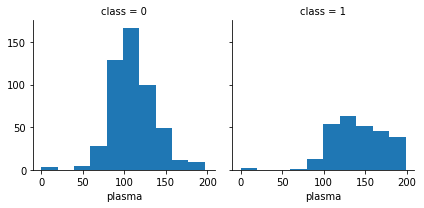

In [0]:
# df 데이터 중 class 컬럼에 해당하는 페싯그리드 그래프를 그림 
grid = sns.FacetGrid(pima, col="class")
# 출력방법 (히스토그램), 출력할 변수명, x축 표시 값 개수
grid.map(plt.hist, "plasma", bins=10)
plt.show()

### 피마 인디언 당뇨병 예측 실행

In [0]:
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
# 특성과 레이블 분리
X = pima.values[:, 0:8]
Y = pima.values[:, 8]

In [0]:
from keras.models import Sequential
from keras.layers import Dense

# 모델의 설정
model_pima = Sequential()
model_pima.add(Dense(12, input_dim=8, activation="relu"))
model_pima.add(Dense(8, activation="relu"))           
model_pima.add(Dense(1, activation="sigmoid"))               

In [0]:
# 모델 컴파일
model_pima.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [0]:
# 모델 실행
# verbose = 0 : 실행과정 미출력
model_pima.fit(X, Y, epochs=200, batch_size=10, verbose=0)

In [0]:
# 모델 평가
model_pima.evaluate(X, Y)[1]

768/768 [==============================] - 1s 694us/step


0.8033854166666666

## 붓꽃 데이터 셋으로 다중 분류

In [0]:
import pandas as pd

iris = pd.read_csv("/gdrive/My Drive/Colab Notebooks/인공지능강의안/data/iris.csv",
                 names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


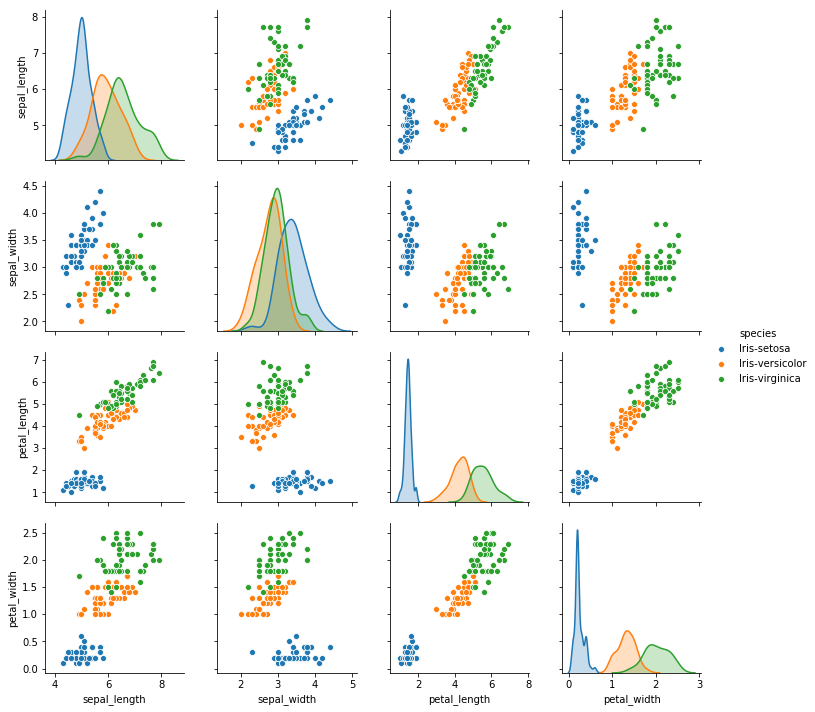

In [0]:
import seaborn as sns

# pariplot () : 실수형 다차원 플롯
# hue : 카테고리 값에 따라 색상 변경
sns.pairplot(iris, hue="species")
plt.show()

In [0]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

dataset = iris.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

### 원 핫 인코딩 (One hot encoding)

- 문자열을 희소값으로 변경하는 것 

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# 문자열을 숫자로 바꿔줌, array(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])가 array([1, 2, 3])으로 변경 
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 원-핫 인코딩 수행, array([1, 2, 3])가 array([[1., 0., 0.], [0., 1., 0.], [0, 0, 1]])으로 변경
Y_encoded = np_utils.to_categorical(Y)

Y_encoded

### 훈련하기

In [0]:
# 모델 설정
model_iris = Sequential()
model_iris.add(Dense(16, input_dim=4, activation='relu'))
# 분류 문제이므로 softmax를 사용
model_iris.add(Dense(3, activation='softmax'))

In [0]:
# 모델 컴파일 (분류이므로 CE를 사용)
model_iris.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# 모델 실행
model_iris.fit(X, Y_encoded, epochs=50, batch_size=1, verbose=0)

In [0]:
# 모델 평가
model_iris.evaluate(X, Y_encoded)[1]

150/150 [==============================] - 1s 3ms/step


0.9733333333333334

## 과적합 피하기 (sonar 데이터 셋)

In [0]:
# 컬럼명이 없도록 데이터 로드
# 첫 번째 행이 칼럼 이름이라면 header=0로 설정
sonar = pd.read_csv("/gdrive/My Drive/Colab Notebooks/인공지능강의안/data/sonar.csv", header=None)

sonar.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [0]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 분리 (특성과 레이블)
dataset = sonar.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

In [0]:
# 레이블을 숫자로 변경
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [0]:
# 모델 설정
model_sonar = Sequential()
model_sonar.add(Dense(24, input_dim=60, activation='relu'))
model_sonar.add(Dense(10, activation='relu'))
model_sonar.add(Dense(1, activation='sigmoid'))

In [0]:
# 모델 컴파일
model_sonar.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [0]:
# 모델 실행
model_sonar.fit(X, Y, epochs=200, batch_size=5, verbose=0)

In [0]:
#모델 평가
model_sonar.evaluate(X, Y)[1]

208/208 [==============================] - 1s 3ms/step


0.9903846153846154

## 과적합 피하기 - 훈련 셋과 테스트 셋으로 분리하기

In [0]:
from sklearn.model_selection import train_test_split

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

dataset = sonar.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

# 레이블을 숫자로 변경
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 훈련 셋과 테스트 셋으로 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [0]:
# 모델 설정
model_sonar2 = Sequential()
model_sonar2.add(Dense(24,  input_dim=60, activation='relu'))
model_sonar2.add(Dense(10, activation='relu'))
model_sonar2.add(Dense(1, activation='sigmoid'))

In [0]:
# 모델 컴파일
model_sonar2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [0]:
# 모델 실행
model_sonar2.fit(X_train, Y_train, epochs=130, batch_size=5, verbose=0)

In [0]:
# 테스트 셋으로 모델 평가
model_sonar2.evaluate(X_test, Y_test)[1]

63/63 [==============================] - 0s 163us/step


0.8095237981705439